# Post Analysis 1 - 2022 TOP 20 zip codes in Housing Price Increase

In this notebook, I analyze the forecasted data. I find the TOP 20 ZIP codes in terms of the housing price increase and plot them on a map using Geo Pandas.


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import contextily as cx


First, I load my housing price forecast data.

In [2]:
df = pd.read_csv('Data/dcfull.csv')
df.head()

,zipcode,date,median_listing_price,active_listing_count,netinflow,change_price,change_listing,change_inflow
0,20001,2018-01-01,730000.0,81.0,-61.0,NaN,NaN,NaN
1,20001,2018-02-01,779000.0,89.0,-138.0,NaN,NaN,NaN
2,20001,2018-03-01,729000.0,103.0,-163.0,NaN,NaN,NaN
3,20001,2018-04-01,717000.0,117.0,-94.0,NaN,NaN,NaN
4,20001,2018-05-01,754950.0,125.0,-131.0,NaN,NaN,NaN


Next, I load US zip codes shape file for Geo Panda. 

In [3]:
usa = gpd.read_file("Shape/tl_2019_us_zcta510/tl_2019_us_zcta510.shp")
usa['zipcode'] = usa.ZCTA5CE10.astype('int')
usa.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,zipcode
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327...",43451
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537...",43452
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...",43456
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253...",43457
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532...",43458


Next, I use my GeoIDs data (df_geo) to filter zip codes in Washington DC area. 

Read my GeoIDs data in below. 

In [4]:
# Read Geo Data 
df_g = pd.read_csv('Data/df_geo.csv')
# Include only Washington DC metro area 
cz = df_g[['countyname', 'countyfips', 'ZIP', 'stateabbrev']][df_g.czname=='Washington DC']
# Adjust columns names and data type 
cz.rename(columns={'ZIP':'zipcode', 'countyfips':'CTFIPS'}, inplace=True)
cz.CTFIPS = cz.CTFIPS.astype('int')


I merge us zip code shape files to GeoIDs data and drop outside of Washington DC metro area. 

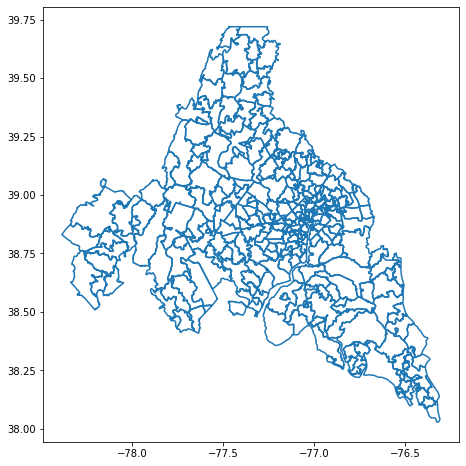

In [5]:
map_cz = usa.merge(cz, on='zipcode', how='inner')
map_cz.boundary.plot(figsize=(8, 8));

Now I have a zip code shape file which includes only Washington DC metro area. The above figure maps the zip codes included in my study. 

Currently, housing prices and my forecast data are on a monthly basis. To see the changes across years, I create a new data frame that averaged price data across years.

In the cell below, I created a year column from date data, and created the new data frame by year. 

In [6]:
df['year']=df.date.astype(str).str[:4]

df_year= df.groupby(['zipcode', 'year']).mean()

df_year.reset_index(inplace=True)


I merge the year data and the county shape file. 

In [7]:
# Merge with county map shape file 
df_map_year = map_cz.merge(df_year, on='zipcode', how ='right')
df_map_year.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,...,countyname,CTFIPS,stateabbrev,year,median_listing_price,active_listing_count,netinflow,change_price,change_listing,change_inflow
0,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,District Of Columbia,11001,DC,2018,748983.250000,121.083333,-125.250000,NaN,NaN,NaN
1,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,District Of Columbia,11001,DC,2019,776978.458333,116.916667,-152.833333,0.037639,-0.015013,0.504855
2,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,District Of Columbia,11001,DC,2020,750324.916667,158.000000,-302.916667,-0.033308,0.327298,1.189394
3,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,District Of Columbia,11001,DC,2021,717662.500000,175.750000,-167.750000,-0.040660,0.202624,-0.377489
4,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,District Of Columbia,11001,DC,2022,734489.892526,176.761422,-224.834359,0.024822,0.016119,0.444214


I create a new data frame for each year, 2019 to 2022. 

In [8]:
df19 = df_map_year[df_map_year.year=='2019']
df20 = df_map_year[df_map_year.year=='2020']
df21 = df_map_year[df_map_year.year=='2021']
df22 = df_map_year[df_map_year.year=='2022']

Next, I plot housing price change by year on a map. 


Housing price changes in 2019.

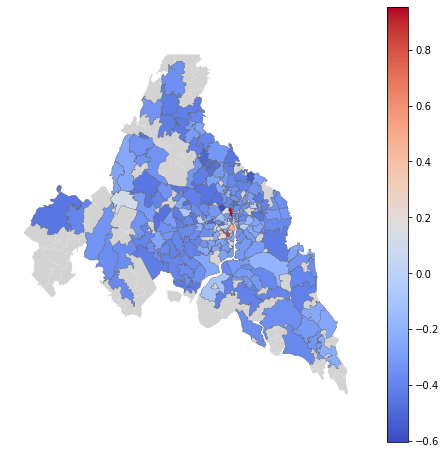

In [9]:
# 2019 data 

# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

# Plot a figure
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");



In 2019, the housing price increased only in a center of the city.

Next, I plot housing price changes in 2020.  

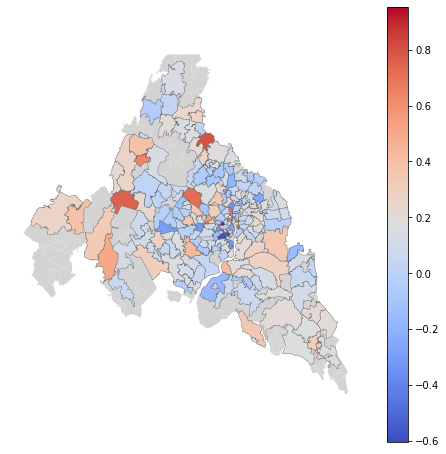

In [10]:
# Year 2020
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

In 2020, the housing prices outside of the city started rising. 

Next, I plot housing price changes in 2021. 

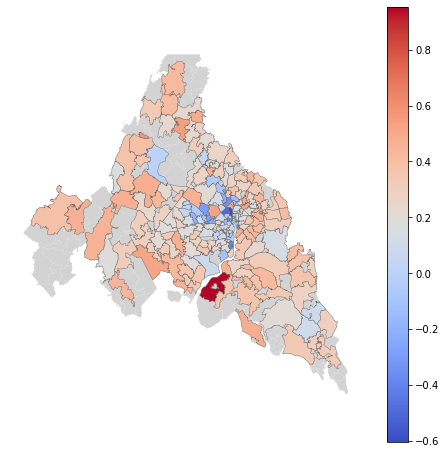

In [11]:
# year 2021

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off");

In 2021, the housing price outside of the city kept rising rapidly.

Next, I plot my forecast for 2022.

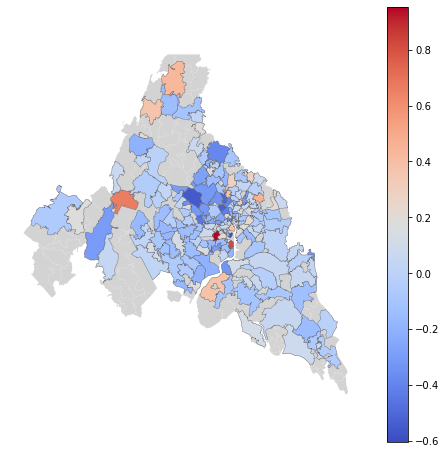

In [12]:
# 2022 forecast 
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)


ax.axis("off"); 

My forecast shows that the trend of rising housing prices will slow down in 2022. But I still see some strong growth in some zip codes. 

Next, I plot the TOP 10 zip codes in terms of price changes in 2022. 

First, I create a new data frame for the TOP10 zip codes.  

In [13]:
top10 = df22.sort_values('change_price', ascending=False).head(20)

save = top10[['zipcode', 'CTFIPS', 'stateabbrev', 'change_price', 'median_listing_price', 'active_listing_count', 'netinflow']]

save.to_csv('Data/top10_22.csv')

I plot the top10 zip codes on top of the base map. 

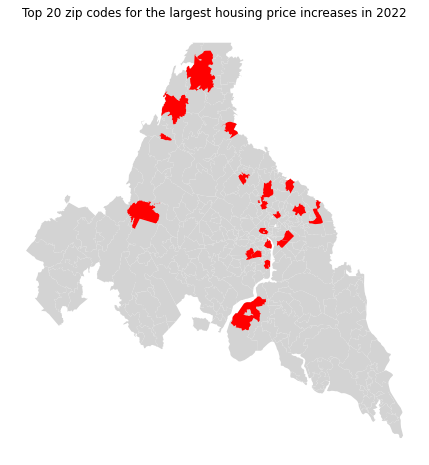

In [14]:
fig, ax = plt.subplots(figsize = (8,8))
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top10.plot(ax=ax, color='red')
ax.set_title('Top 20 zip codes for the largest housing price increases in 2022')
ax.axis("off");

Next, I plot the TOP 10 zip codes in 2019 for comparison. 

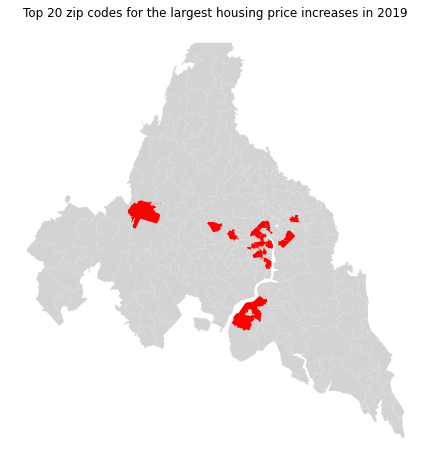

In [15]:
top10_19 = df19.sort_values('change_price', ascending=False).head(20)

fig, ax = plt.subplots(figsize = (8,8))
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top10_19.plot(ax=ax, color='red')
ax.set_title('Top 20 zip codes for the largest housing price increases in 2019')
ax.axis("off");

In 2019, most TOP 20 zip codes are clustered around DC area. In 2022, the zip codes are more spread across Virginia and Maryland. My prediction follows a recent trend that people are moving out of large cities. 